### Final Accuracy_score: 0.6853846153846154

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
os.chdir('D:\\prasad\\practice\\My Working Projects\\Inprocess\\Wine Quality Prediction')

In [4]:
df=pd.read_csv('winequality.csv')

In [5]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [6]:
df.shape

(6497, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
for col,value in df.items():
    if col !='type':
        df[col]=df[col].fillna(df[col].mean())

In [11]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

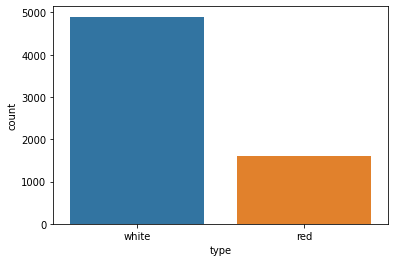

In [12]:
sns.countplot(df['type'])
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

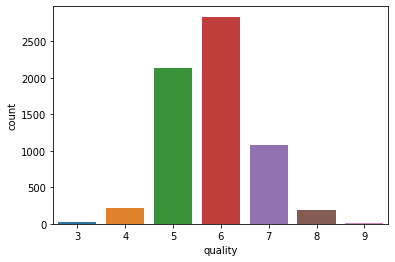

In [13]:
sns.countplot(df['quality'])

In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


In [15]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [16]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [17]:
df.shape

(6497, 13)

In [18]:
df.drop('type',axis=1,inplace=True)

In [19]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [20]:
df.shape

(6497, 12)

In [21]:
df2=df.drop('quality',axis=1)

In [22]:
corln=df2.corrwith(df.quality)

In [23]:
corln.sort_values(ascending=False)

alcohol                 0.444319
citric acid             0.085699
free sulfur dioxide     0.055463
sulphates               0.038713
pH                      0.019356
residual sugar         -0.036819
total sulfur dioxide   -0.041385
fixed acidity          -0.076967
chlorides              -0.200818
volatile acidity       -0.265838
density                -0.305858
dtype: float64

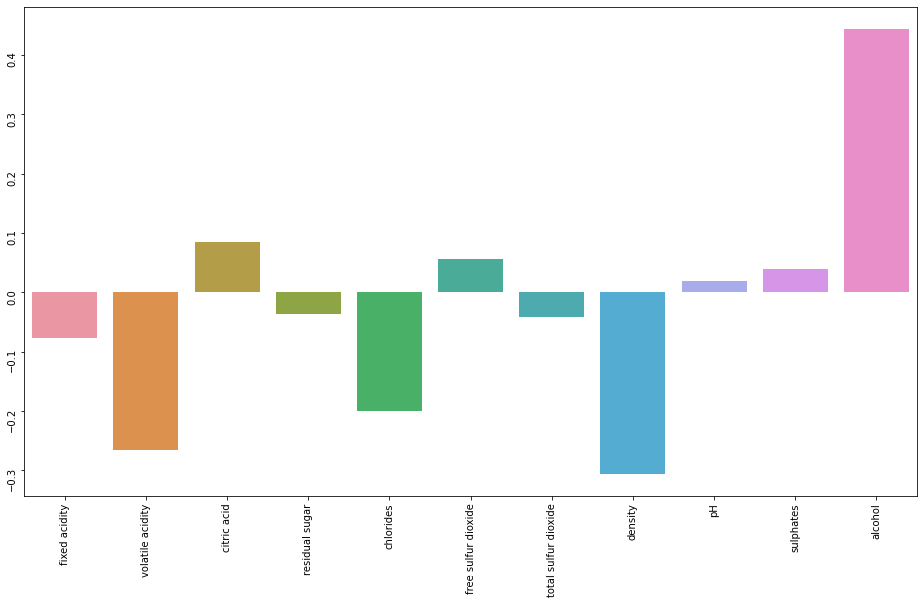

In [24]:
plt.figure(figsize=(16,9))
ax=sns.barplot(corln.index,corln)
ax.tick_params(labelrotation=90)

In [25]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [26]:
X=df.drop('quality',axis=1)
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [27]:
y=df['quality']
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [28]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [29]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split,cross_val_score

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
def classify(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print('accuracy_score: ',accuracy_score(y_test,y_pred))
    print('Test_Score: ',model.score(X_test,y_test))
    print('train_Score: ',model.score(X_train,y_train))
    cv=cross_val_score(model,X_train,y_train,cv=5)
    print('N_Split: ',cv)
    print('Average_score: ',np.average(cv))

In [33]:
Log_reg=classify(LogisticRegression(),X,y)

accuracy_score:  0.4746153846153846
Test_Score:  0.4746153846153846
train_Score:  0.4721954974023475
N_Split:  [0.45865385 0.47019231 0.4879692  0.47449471 0.45043311]
Average_score:  0.46834863404160804


In [34]:
rf=classify(RandomForestClassifier(),X,y)

accuracy_score:  0.6984615384615385
Test_Score:  0.6984615384615385
train_Score:  1.0
N_Split:  [0.64134615 0.67403846 0.67179981 0.65351299 0.67083734]
Average_score:  0.6623069519508403


In [35]:
dt=classify(DecisionTreeClassifier(),X,y)

accuracy_score:  0.6230769230769231
Test_Score:  0.6230769230769231
train_Score:  1.0
N_Split:  [0.55769231 0.58557692 0.59672762 0.55341675 0.58229066]
Average_score:  0.5751408528910935


In [36]:
Adaboost=classify(AdaBoostClassifier(),X,y)

accuracy_score:  0.3776923076923077
Test_Score:  0.3776923076923077
train_Score:  0.36905907254185105
N_Split:  [0.15       0.27692308 0.4533205  0.23387873 0.20500481]
Average_score:  0.26382542385429775


In [37]:
svc=classify(SVC(),X,y)

accuracy_score:  0.4330769230769231
Test_Score:  0.4330769230769231
train_Score:  0.44333269193765634
N_Split:  [0.44711538 0.44038462 0.42733397 0.44465833 0.43888354]
Average_score:  0.4396751684311838


In [38]:
knn=classify(KNeighborsClassifier(),X,y)

accuracy_score:  0.48
Test_Score:  0.48
train_Score:  0.6490282855493554
N_Split:  [0.49807692 0.48653846 0.46583253 0.46294514 0.43984601]
Average_score:  0.47064781224550234


In [39]:
XGB=classify(XGBClassifier(),X,y)

accuracy_score:  0.6792307692307692
Test_Score:  0.6792307692307692
train_Score:  0.9846065037521647
N_Split:  [0.61923077 0.64230769 0.65543792 0.64581328 0.6506256 ]
Average_score:  0.6426830532316576


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5197, 11), (1300, 11), (5197,), (1300,))

In [42]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [43]:
sc=StandardScaler()

In [44]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [45]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

In [46]:
X_train_sc.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.479122,-0.543597,0.279593,0.559298,-0.320934,1.318389,1.136624,0.366609,-0.860252,-0.751081,-1.085069
1,0.974749,-1.087085,0.210654,-0.799805,-0.497232,-0.365454,0.553731,-0.398540,-1.606372,-1.148410,-0.414058


In [47]:
def classify_sc(model,X_train,X_test,y_train,y_test):
    sc=StandardScaler()
    X_train_sc=sc.fit_transform(X_train)
    X_test_sc=sc.fit_transform(X_test)
    X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
    X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    print('accuracy_score: ',accuracy_score(y_test,y_pred))
    print('Test_Score: ',model.score(X_test_sc,y_test))
    print('train_Score: ',model.score(X_train_sc,y_train))
    cv=cross_val_score(model,X_train_sc,y_train,cv=5)
    print('N_Split: ',cv)
    print('Average_score: ',np.average(cv))

### LogisticRegression

In [48]:
classify_sc(LogisticRegression(),X_train,X_test,y_train,y_test)

accuracy_score:  0.536923076923077
Test_Score:  0.536923076923077
train_Score:  0.5495478160477199
N_Split:  [0.55576923 0.55192308 0.54282964 0.53994225 0.533205  ]
Average_score:  0.544733841711705


In [49]:
classify(LogisticRegression(),X,y)

accuracy_score:  0.4746153846153846
Test_Score:  0.4746153846153846
train_Score:  0.4721954974023475
N_Split:  [0.45865385 0.47019231 0.4879692  0.47449471 0.45043311]
Average_score:  0.46834863404160804


### RandomForestClassifier

In [50]:
classify_sc(RandomForestClassifier(),X_train,X_test,y_train,y_test)

accuracy_score:  0.6823076923076923
Test_Score:  0.6823076923076923
train_Score:  1.0
N_Split:  [0.64134615 0.66923077 0.68334937 0.65543792 0.66506256]
Average_score:  0.6628853557414673


In [51]:
classify(RandomForestClassifier(),X,y)

accuracy_score:  0.6876923076923077
Test_Score:  0.6876923076923077
train_Score:  1.0
N_Split:  [0.63557692 0.67115385 0.67564966 0.65447546 0.67276227]
Average_score:  0.6619236321907159


### DecisionTreeClassifier

In [52]:
classify_sc(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

accuracy_score:  0.5753846153846154
Test_Score:  0.5753846153846154
train_Score:  1.0
N_Split:  [0.55480769 0.58173077 0.60635226 0.54090472 0.57266603]
Average_score:  0.5712922928851707


In [53]:
classify(DecisionTreeClassifier(),X,y)

accuracy_score:  0.6230769230769231
Test_Score:  0.6230769230769231
train_Score:  1.0
N_Split:  [0.55865385 0.58653846 0.59672762 0.54764196 0.58806545]
Average_score:  0.5755254682757089


### SVC

In [54]:
classify_sc(SVC(),X_train,X_test,y_train,y_test)

accuracy_score:  0.5823076923076923
Test_Score:  0.5823076923076923
train_Score:  0.6068885895709063
N_Split:  [0.56057692 0.57403846 0.56689124 0.56977863 0.56977863]
Average_score:  0.5682127785592657


In [55]:
classify(SVC(),X,y)

accuracy_score:  0.4330769230769231
Test_Score:  0.4330769230769231
train_Score:  0.44333269193765634
N_Split:  [0.44711538 0.44038462 0.42733397 0.44465833 0.43888354]
Average_score:  0.4396751684311838


### KNeighborsClassifier

In [56]:
classify_sc(KNeighborsClassifier(),X_train,X_test,y_train,y_test)

accuracy_score:  0.5592307692307692
Test_Score:  0.5592307692307692
train_Score:  0.6990571483548201
N_Split:  [0.52884615 0.54615385 0.53512993 0.54764196 0.56592878]
Average_score:  0.5447401347449471


In [57]:
classify(KNeighborsClassifier(),X,y)

accuracy_score:  0.48
Test_Score:  0.48
train_Score:  0.6490282855493554
N_Split:  [0.49807692 0.48653846 0.46583253 0.46294514 0.43984601]
Average_score:  0.47064781224550234


### AdaBoostClassifier

In [58]:
classify_sc(AdaBoostClassifier(),X_train,X_test,y_train,y_test)

accuracy_score:  0.37461538461538463
Test_Score:  0.37461538461538463
train_Score:  0.36905907254185105
N_Split:  [0.15       0.27692308 0.4533205  0.23387873 0.20500481]
Average_score:  0.26382542385429775


In [59]:
classify(AdaBoostClassifier(),X,y)

accuracy_score:  0.3776923076923077
Test_Score:  0.3776923076923077
train_Score:  0.36905907254185105
N_Split:  [0.15       0.27692308 0.4533205  0.23387873 0.20500481]
Average_score:  0.26382542385429775


### XGBClassifier

In [60]:
classify_sc(XGBClassifier(),X_train,X_test,y_train,y_test)

accuracy_score:  0.6630769230769231
Test_Score:  0.6630769230769231
train_Score:  0.9846065037521647
N_Split:  [0.62019231 0.64038462 0.65543792 0.64773821 0.6506256 ]
Average_score:  0.6428757311023914


In [61]:
classify(XGBClassifier(),X,y)

accuracy_score:  0.6792307692307692
Test_Score:  0.6792307692307692
train_Score:  0.9846065037521647
N_Split:  [0.61923077 0.64230769 0.65543792 0.64581328 0.6506256 ]
Average_score:  0.6426830532316576


### Final Select Model

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

accuracy_score:  0.7038461538461539
Test_Score:  0.7038461538461539
train_Score:  1.0
N_Split:  [0.65192308 0.66634615 0.67276227 0.64581328 0.6641001 ]
Average_score:  0.6601889760864736


In [64]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, X, y)

accuracy_score:  0.6715384615384615
Test_Score:  0.6715384615384615
train_Score:  0.9628631903020973
N_Split:  [0.625      0.63653846 0.65928778 0.6400385  0.65255053]
Average_score:  0.6426830532316576


In [62]:
rf=RandomForestClassifier()
rf.fit(X_train_sc,y_train)
y_pred=rf.predict(X_test_sc)
print('Accuracy_score:',accuracy_score(y_test,y_pred))

Accuracy_score: 0.6853846153846154


### Save Model in Pickle & Joblib

In [67]:
import pickle
import joblib

In [68]:
pickle.dump(rf,open('wine.pickle','wb'))

In [69]:
joblib.dump(rf,'wine.joblib')

['wine.joblib']

### Load Pickle

In [70]:
wine_pickle=pickle.load(open('wine.pickle','rb'))

In [73]:
wine_pickle.score(X_test_sc,y_test)

0.6853846153846154

In [72]:
wine_pickle.score(X_train_sc,y_train)

1.0

In [74]:
y_predict=wine_pickle.predict(X_test_sc)

In [75]:
accuracy_score(y_test,y_predict)

0.6853846153846154

### Load Joblib

In [76]:
wine_jobib=joblib.load('wine.joblib')

In [77]:
y_pred_jb=wine_jobib.predict(X_test_sc)

In [78]:
accuracy_score(y_test,y_pred_jb)

0.6853846153846154